<a href="https://colab.research.google.com/github/florianrougier/stocks_analysis/blob/master/Netflix_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


We will explore Netflix Stock Price using 3 methods:

1.   Élément de liste
2.   Élément de liste
3.   Élément de liste


In [1]:
# Import the necessary packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline

import sklearn
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.losses import Huber
from keras.optimizers import SGD

Using TensorFlow backend.


We will load the Neflix csv file from github using the link to the raw version on the file.
[3 ways to import a csv file in google colab](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

In [0]:
url = 'https://raw.githubusercontent.com/florianrougier/stocks_analysis/master/data/NFLX.csv'

# We store the dataset in a pandas dataframe
df = pd.read_csv(url)

We then set the date as the independent variable and look at the first few entries

In [3]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-07,342.200012,355.750000,341.250000,348.679993,348.679993,9105800
2018-09-10,352.269989,352.500000,343.079987,348.410004,348.410004,5752200
2018-09-11,344.670013,356.149994,343.899994,355.929993,355.929993,6198100
2018-09-12,359.079987,370.429993,356.239990,369.950012,369.950012,10480800
2018-09-13,371.910004,374.089996,366.839996,368.149994,368.149994,8366100


Draw a graph of Netflix stock evolution

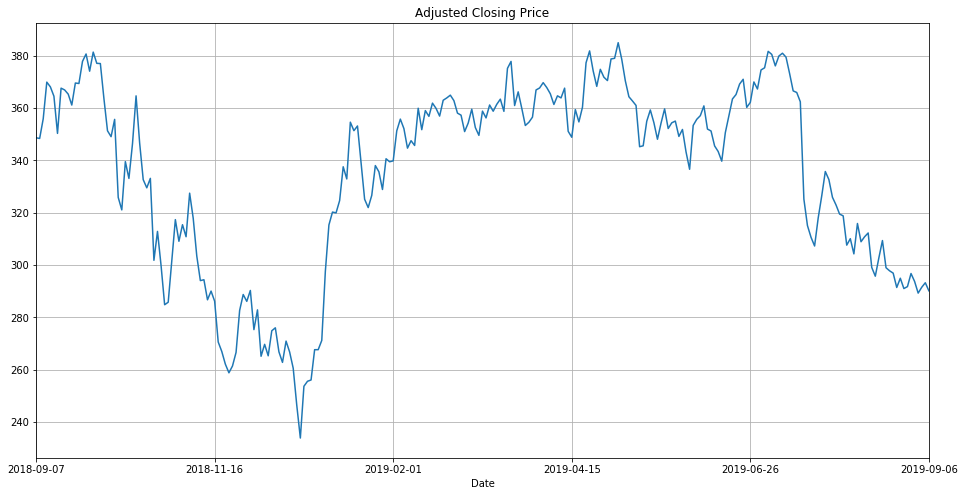

In [4]:
df['Adj Close'].plot(label='NFLX', figsize=(16,8), title="Adjusted Closing Price", grid= True)

Instead of using the date to predict stock prices, we will use batches of 32 prices from the past to predict the price on the 33rd day.

We thus have N-32 training examples with N being the nimber of days we've downloaded for the stock data.


---


TODO:
- try to change the number of days (try 16 or 64 to see if we can get better results)

In [0]:
window_size = 32 # To look at 32 days into the past

num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)

In [0]:
data = df['Adj Close'].values[indices]

In [0]:
X = data[:,:-1]
y = data[:,-1]

In [0]:
# Train Test split
split_fraction = 0.8
ind_split = int(split_fraction * num_samples)
X_train  = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]

## Method 1: Ridge Regression

In [0]:
# Train 
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Infer
Y